In [5]:
# Import dependencies:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in crime csv:
crime_file = "nypd_crime.csv"
crime_df = pd.read_csv(crime_file)

# Take a look:
crime_df.head(10)

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,942919936,77,NaN,06/29/2020,18:10:00,NaN,NaN,COMPLETED,WEEKSVILLE GARDENS,NaN,...,NaN,18-24,BLACK,M,1002388,185584,40.676052,-73.934611,"(40.676051596000036, -73.93461108799994)",POINT (-73.93461108799994 40.676051596000036)
1,444710066,60,NaN,06/20/2020,13:52:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,<18,BLACK,M,984147,150278,40.579163,-74.000372,"(40.57916262500004, -74.00037223199998)",POINT (-74.00037223199998 40.57916262500004)
2,121536456,47,NaN,06/12/2020,23:00:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,18-24,BLACK,F,1021731,263219,40.889078,-73.864443,"(40.88907795500006, -73.86444348399993)",POINT (-73.86444348399993 40.88907795500006)
3,314830920,75,NaN,06/05/2020,20:20:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1013511,181454,40.664686,-73.894529,"(40.66468589900006, -73.89452887499993)",POINT (-73.89452887499993 40.66468589900006)
4,173858725,101,NaN,06/05/2020,19:20:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1053494,161530,40.609777,-73.750613,"(40.60977656700004, -73.75061339299998)",POINT (-73.75061339299998 40.60977656700004)
5,859565694,48,NaN,06/05/2020,00:07:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,18-24,BLACK,M,1016042,249486,40.851407,-73.885084,"(40.85140742400005, -73.88508408799999)",POINT (-73.88508408799999 40.85140742400005)
6,756614793,75,NaN,05/28/2020,23:53:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1012206,180039,40.660806,-73.899239,"(40.66080625500007, -73.89923866699996)",POINT (-73.89923866699996 40.66080625500007)
7,237202728,75,BROOKLYN,05/16/2020,17:56:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,E,1020007,189768,40.687482,-73.871070,"(40.68748208300008, -73.871069677)",POINT (-73.871069677 40.68748208300008)
8,517518318,77,NaN,05/05/2020,22:31:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,998527,185573,40.676028,-73.948531,"(40.67602847200004, -73.94853062299995)",POINT (-73.94853062299995 40.67602847200004)
9,354783980,73,NaN,04/19/2020,14:50:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1009004,180575,40.662287,-73.910778,"(40.66228698700007, -73.91077776999998)",POINT (-73.91077776999998 40.66228698700007)


In [6]:
#Cleaning data; remove unneeded columns, rename to words:

cleaning_df = pd.DataFrame(crime_df[["CMPLNT_NUM", "BORO_NM", "LAW_CAT_CD", "Latitude", "Longitude"]])
cleaning_df = cleaning_df.rename(columns = {"CMPLNT_NUM": "Complaint Number", "BORO_NM": "Borough", 
                                           "LAW_CAT_CD": "Category",})
cleaning_df.head(10)

,Complaint Number,Borough,Category,Latitude,Longitude
0,942919936,NaN,FELONY,40.676052,-73.934611
1,444710066,NaN,FELONY,40.579163,-74.000372
2,121536456,NaN,FELONY,40.889078,-73.864443
3,314830920,NaN,FELONY,40.664686,-73.894529
4,173858725,NaN,FELONY,40.609777,-73.750613
5,859565694,NaN,FELONY,40.851407,-73.885084
6,756614793,NaN,FELONY,40.660806,-73.899239
7,237202728,BROOKLYN,FELONY,40.687482,-73.871070
8,517518318,NaN,FELONY,40.676028,-73.948531
9,354783980,NaN,FELONY,40.662287,-73.910778


In [7]:
cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196853 entries, 0 to 196852
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Complaint Number  196853 non-null  int64  
 1   Borough           196658 non-null  object 
 2   Category          196853 non-null  object 
 3   Latitude          196853 non-null  float64
 4   Longitude         196853 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.5+ MB


In [8]:
# Drop rows with NaN values:
cleaning_df.dropna(inplace=True)


In [9]:
cleaning_df.head(10)

,Complaint Number,Borough,Category,Latitude,Longitude
7,237202728,BROOKLYN,FELONY,40.687482,-73.871070
10,989134472,MANHATTAN,FELONY,40.743335,-73.984079
24,681808925,MANHATTAN,FELONY,40.724180,-74.004576
26,170101826,BROOKLYN,MISDEMEANOR,40.668666,-73.907593
27,817418587,QUEENS,MISDEMEANOR,40.705617,-73.792093
28,736247900,QUEENS,MISDEMEANOR,40.678942,-73.796081
29,722434037,QUEENS,FELONY,40.783919,-73.811034
30,240329077,BROOKLYN,VIOLATION,40.677949,-73.904646
31,807604372,BRONX,MISDEMEANOR,40.812387,-73.904941
32,766630185,BROOKLYN,MISDEMEANOR,40.597437,-73.949513


In [10]:
cleaning_df.reset_index(drop=True, inplace=True)


In [11]:
cleaning_df.head()

,Complaint Number,Borough,Category,Latitude,Longitude
0,237202728,BROOKLYN,FELONY,40.687482,-73.871070
1,989134472,MANHATTAN,FELONY,40.743335,-73.984079
2,681808925,MANHATTAN,FELONY,40.724180,-74.004576
3,170101826,BROOKLYN,MISDEMEANOR,40.668666,-73.907593
4,817418587,QUEENS,MISDEMEANOR,40.705617,-73.792093


In [12]:
# Save output:
cleaning_df.to_csv("crime_clean1.csv")

In [33]:
total_borough_crimes = cleaning_df.Borough.value_counts()
#total_borough_crimes = pd.DataFrame(cleaning_df.Borough.value_counts())
total_borough_crimes
boroughs=total_borough_crimes.index
boroughs
#borough=total_borough_crimes.index()

Index(['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN ISLAND'], dtype='object')

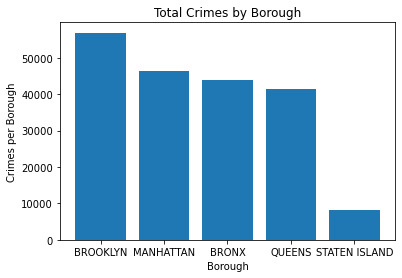

In [34]:
x_axis=np.arange(len(borough))
plt.bar(x_axis, total_borough_crimes)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, boroughs)
plt.title("Total Crimes by Borough")
plt.xlabel("Borough")
plt.ylabel("Crimes per Borough")
plt.show()

In [42]:
# Sort crimes per borough by type, and count them:
# Used sort_index to keep the borough names in order, instead of sorting by value_counts,
# which had made the chart below just show all counts in descending order, not tied to the Borough name.

violations = cleaning_df.Borough[cleaning_df.Category == 'VIOLATION'].value_counts().sort_index()
misdemeanors = cleaning_df.Borough[cleaning_df.Category == 'MISDEMEANOR'].value_counts().sort_index()
felonies = cleaning_df.Borough[cleaning_df.Category == 'FELONY'].value_counts().sort_index()


In [48]:
violations

BRONX            7668
BROOKLYN         9315
MANHATTAN        6179
QUEENS           7030
STATEN ISLAND    1749
Name: Borough, dtype: int64

In [44]:
misdemeanors

BRONX            23361
BROOKLYN         28481
MANHATTAN        25129
QUEENS           20921
STATEN ISLAND     4420
Name: Borough, dtype: int64

In [45]:
felonies

BRONX            12817
BROOKLYN         19060
MANHATTAN        14961
QUEENS           13484
STATEN ISLAND     2083
Name: Borough, dtype: int64

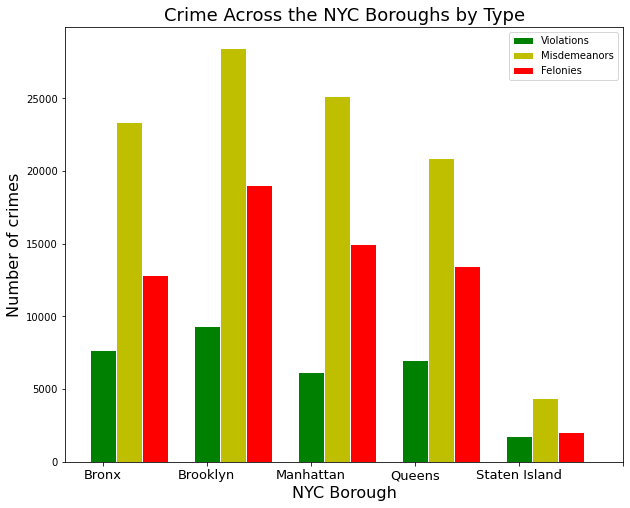

In [52]:
barWidth = 0.25
# Grouped bar chart:

bar1 = violations
bar2 = misdemeanors
bar3 = felonies

# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Format:
plt.figure(figsize = (10, 8))
plt.bar(r1, bar1, color='g', width=barWidth, edgecolor='white', label='Violations')
plt.bar(r2, bar2, color='y', width=barWidth, edgecolor='white', label='Misdemeanors')
plt.bar(r3, bar3, color='r', width=barWidth, edgecolor='white', label='Felonies')
plt.xticks(np.arange(6), ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"), fontsize = 13)
plt.title("Crime Across the NYC Boroughs by Type", fontsize = 18)
plt.xlabel("NYC Borough", fontsize = 16)
plt.ylabel("Number of crimes", fontsize = 16)
plt.legend()

In [ ]:
# NYC populations per borough, census.gov, https://tinyurl.com/ybmwj89r:

# Bronx          1418207
# Brooklyn       2559903
# Manhattan      1628706
# Queens         2253858
# Staten Island   476143



In [ ]:
# Number of each type of crime per county:
#borough_crime_counts = pd.DataFrame(cleaning_df.groupby(["Borough"])["Category"].value_counts())
#borough_crime_counts